In [1]:
import os
os.chdir('..')

In [2]:
import torch
import numpy as np
from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _box_plots

%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device('cuda:4' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN_large_10_6', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:4


## Box plot baseline evaluation

#### Evaluate CRs on all graph configurations

In [4]:
import pickle # TODO remove

rng = np.random.default_rng()
num_trials = 150
batch_size = 500
node_configs = [(20, 10)]
graph_configs = MAIN_TESTING_GRAPH_CONFIGS
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {'rng': rng},
    'naor_lp_rounding': {'rng': rng},
    'pollner_lp_rounding': {'rng': rng}
}

data = {node_config: {} for node_config in node_configs}

# for node_config in node_configs:
#     for graph_config in graph_configs:
#             print(node_config, graph_config)
#             instances = sample_instances(
#                 *node_config,
#                 num_trials,
#                 rng,
#                 args.__dict__,
#                 **graph_config
#             )

#             cr_ratios, _ = evaluate_model(
#                 meta_model=None,
#                 meta_model_type=None,
#                 base_models=[GNN],
#                 instances=instances,
#                 batch_size=batch_size,
#                 rng=rng,
#                 num_realizations=20,
#                 baselines=['greedy', 'greedy_t', 'lp_rounding', 'naor_lp_rounding', 'pollner_lp_rounding'],
#                 **baselines_kwargs
#             )

#             data[node_config][str(graph_config)] = cr_ratios

#             with open(f"experiments/box_plots_main.pickle", 'wb') as handle:
#                 pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)


#### Generate box plots

KeyError: 'GENConv'

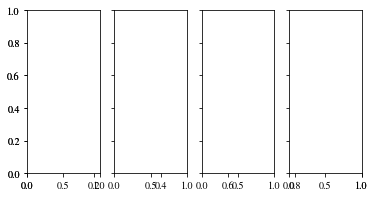

In [13]:
with open(f"experiments/box_plots_multiple_gnns_all.pickle", 'rb') as handle:
    data = pickle.load(handle)

results = {}

node_config = node_configs[0]

str_graph_configs = {str(config) for config in MAIN_TESTING_GRAPH_CONFIGS}
for graph_type, val in data[node_configs[0]].items():
	if graph_type in str_graph_configs:
		results[graph_type] = val

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

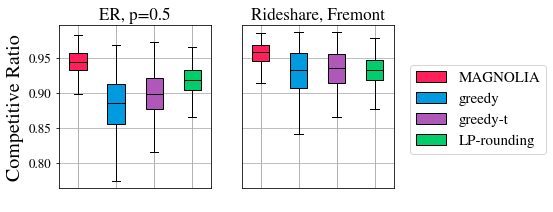

In [26]:
from params import SMALL_TESTING_GRAPH_CONFIGS
with open(f"experiments/box_plots_all.pickle", 'rb') as handle:
    data = pickle.load(handle)

results = {}

node_config = node_configs[0]

str_graph_configs = {str(config) for config in SMALL_TESTING_GRAPH_CONFIGS}
for graph_type, val in data[node_configs[0]].items():
	if graph_type in str_graph_configs:
		results[graph_type] = val

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

In [41]:
with open(f"experiments/box_plots_all.pickle", 'rb') as handle:
    data = pickle.load(handle)

results = {}

node_config = node_configs[0]

str_graph_configs = {str(config) for config in ALL_TESTING_GRAPH_CONFIGS}
for graph_type, val in data[node_configs[0]].items():
    if graph_type in str_graph_configs:
        aggregated_val = {}
        val.pop("naor_lp_rounding")
        val.pop("pollner_lp_rounding")
        for model, crs in val.items():
            aggregated_val[model] = np.mean(crs)
        max = np.max(list(aggregated_val.values()))
        for model, cr in aggregated_val.items():
            if np.isclose(cr,max):
                aggregated_val[model] = '\\textbf{{{:.3f}}}'.format(round(np.mean(cr), 3))
            else:            
                aggregated_val[model] = '{:.3f}'.format(round(np.mean(cr), 3))

        crs = aggregated_val.keys()
        string = f"{aggregated_val['learned']} & {aggregated_val['greedy']} & {aggregated_val['greedy_t']} & {aggregated_val['lp_rounding']}"
        results[graph_type] = string
print(results)
for graph_type, val in results.items():
    print(graph_type)
    print(val)



{"{'graph_type': 'ER', 'p': 0.25, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.945} & 0.881 & 0.887 & 0.929', "{'graph_type': 'ER', 'p': 0.5, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.943} & 0.883 & 0.897 & 0.917', "{'graph_type': 'ER', 'p': 0.75, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.949} & 0.905 & 0.914 & 0.915', "{'graph_type': 'BA', 'ba_param': 4, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.937} & 0.857 & 0.875 & 0.921', "{'graph_type': 'BA', 'ba_param': 6, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.944} & 0.885 & 0.896 & 0.916', "{'graph_type': 'BA', 'ba_param': 8, 'weighted': True, 'weight_scaling': 1}": '\\textbf{0.955} & 0.911 & 0.922 & 0.921', "{'graph_type': 'GEOM', 'q': 0.15, 'd': 2, 'weighted': True}": '\\textbf{0.978} & 0.938 & 0.938 & 0.958', "{'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}": '\\textbf{0.961} & 0.922 & 0.922 & 0.939', "{'graph_type': 'GEOM', 'q': 0.5, 'd': 2, 'weighted': True}": '\\textbf{0.